# INFO BASICA

# LIBRERIAS

In [1]:
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math

from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

C:\Users\migue\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [3]:
# Leo los indicadores

indicadores = pd.read_excel('./data/Serie de indicadores Macro.xlsx', sheet_name='Hoja1', 
                           usecols=['Date', 'Citi Economic Surprise - USA'])

indicadores.columns = ['Date','Citi']
indicadores['Date'] = pd.to_datetime(indicadores['Date'], format="%Y-%m-%d")
indicadores = indicadores.set_index('Date')
indicadores = indicadores.loc['2015-04-30':,:]

In [4]:
# Veo una muestra

indicadores.head(10)

,Citi
Date,
2015-04-30,-62.2
2015-05-01,-62.3
2015-05-04,-56.1
2015-05-05,-65.3
2015-05-06,-67.3
2015-05-07,-64.7
2015-05-08,-64.3
2015-05-11,-61.0
2015-05-12,-59.5


In [5]:
# Leo los indicadores

# Leo los tipos de cambio de las divisas

wheat = pd.read_excel('./data/Series de precios.xlsx', sheet_name='Hoja2', 
                        usecols=['Date','Wheat'])
wheat.columns = ['Date','Precio']
wheat['Date'] = pd.to_datetime(wheat['Date'], format="%Y-%m-%d")
wheat = wheat.set_index('Date')
wheat = wheat.loc['2015-04-30':,:]
wheat = wheat.applymap(lambda x: x/1.1285216494845334)

In [6]:
wheat.head()

,Precio
Date,
2015-04-30,321.216700
2015-05-01,318.779884
2015-05-04,317.893769
2015-05-05,320.109056
2015-05-06,324.761160


In [7]:
wheat

,Precio
Date,
2015-04-30,321.216700
2015-05-01,318.779884
2015-05-04,317.893769
2015-05-05,320.109056
2015-05-06,324.761160
2015-05-07,317.007653
2015-05-08,317.672240
2015-05-11,317.450711
2015-05-12,316.343067


In [8]:
# Escojo el Standar & Poors 500 y lo uno al indicador

wheat_final = wheat.merge(indicadores, how='inner', on='Date')

In [9]:
# Veo una muestra

wheat_final.head(20)

,Precio,Citi
Date,,
2015-04-30,321.216700,-62.2
2015-05-01,318.779884,-62.3
2015-05-04,317.893769,-56.1
2015-05-05,320.109056,-65.3
2015-05-06,324.761160,-67.3
2015-05-07,317.007653,-64.7
2015-05-08,317.672240,-64.3
2015-05-11,317.450711,-61.0
2015-05-12,316.343067,-59.5


In [10]:
# Calculo la rentabilidad, lo hago mediante la variación porcentual de un día a otro

wheat_final['Rentabilidad'] = wheat_final.Precio.pct_change() * 100
wheat_final.Rentabilidad = wheat_final.Rentabilidad.fillna(0)

In [11]:
# Visualizo una muestra

wheat_final.head(20)

,Precio,Citi,Rentabilidad
Date,,,
2015-04-30,321.216700,-62.2,0.000000
2015-05-01,318.779884,-62.3,-0.758621
2015-05-04,317.893769,-56.1,-0.277971
2015-05-05,320.109056,-65.3,0.696864
2015-05-06,324.761160,-67.3,1.453287
2015-05-07,317.007653,-64.7,-2.387449
2015-05-08,317.672240,-64.3,0.209644
2015-05-11,317.450711,-61.0,-0.069735
2015-05-12,316.343067,-59.5,-0.348918


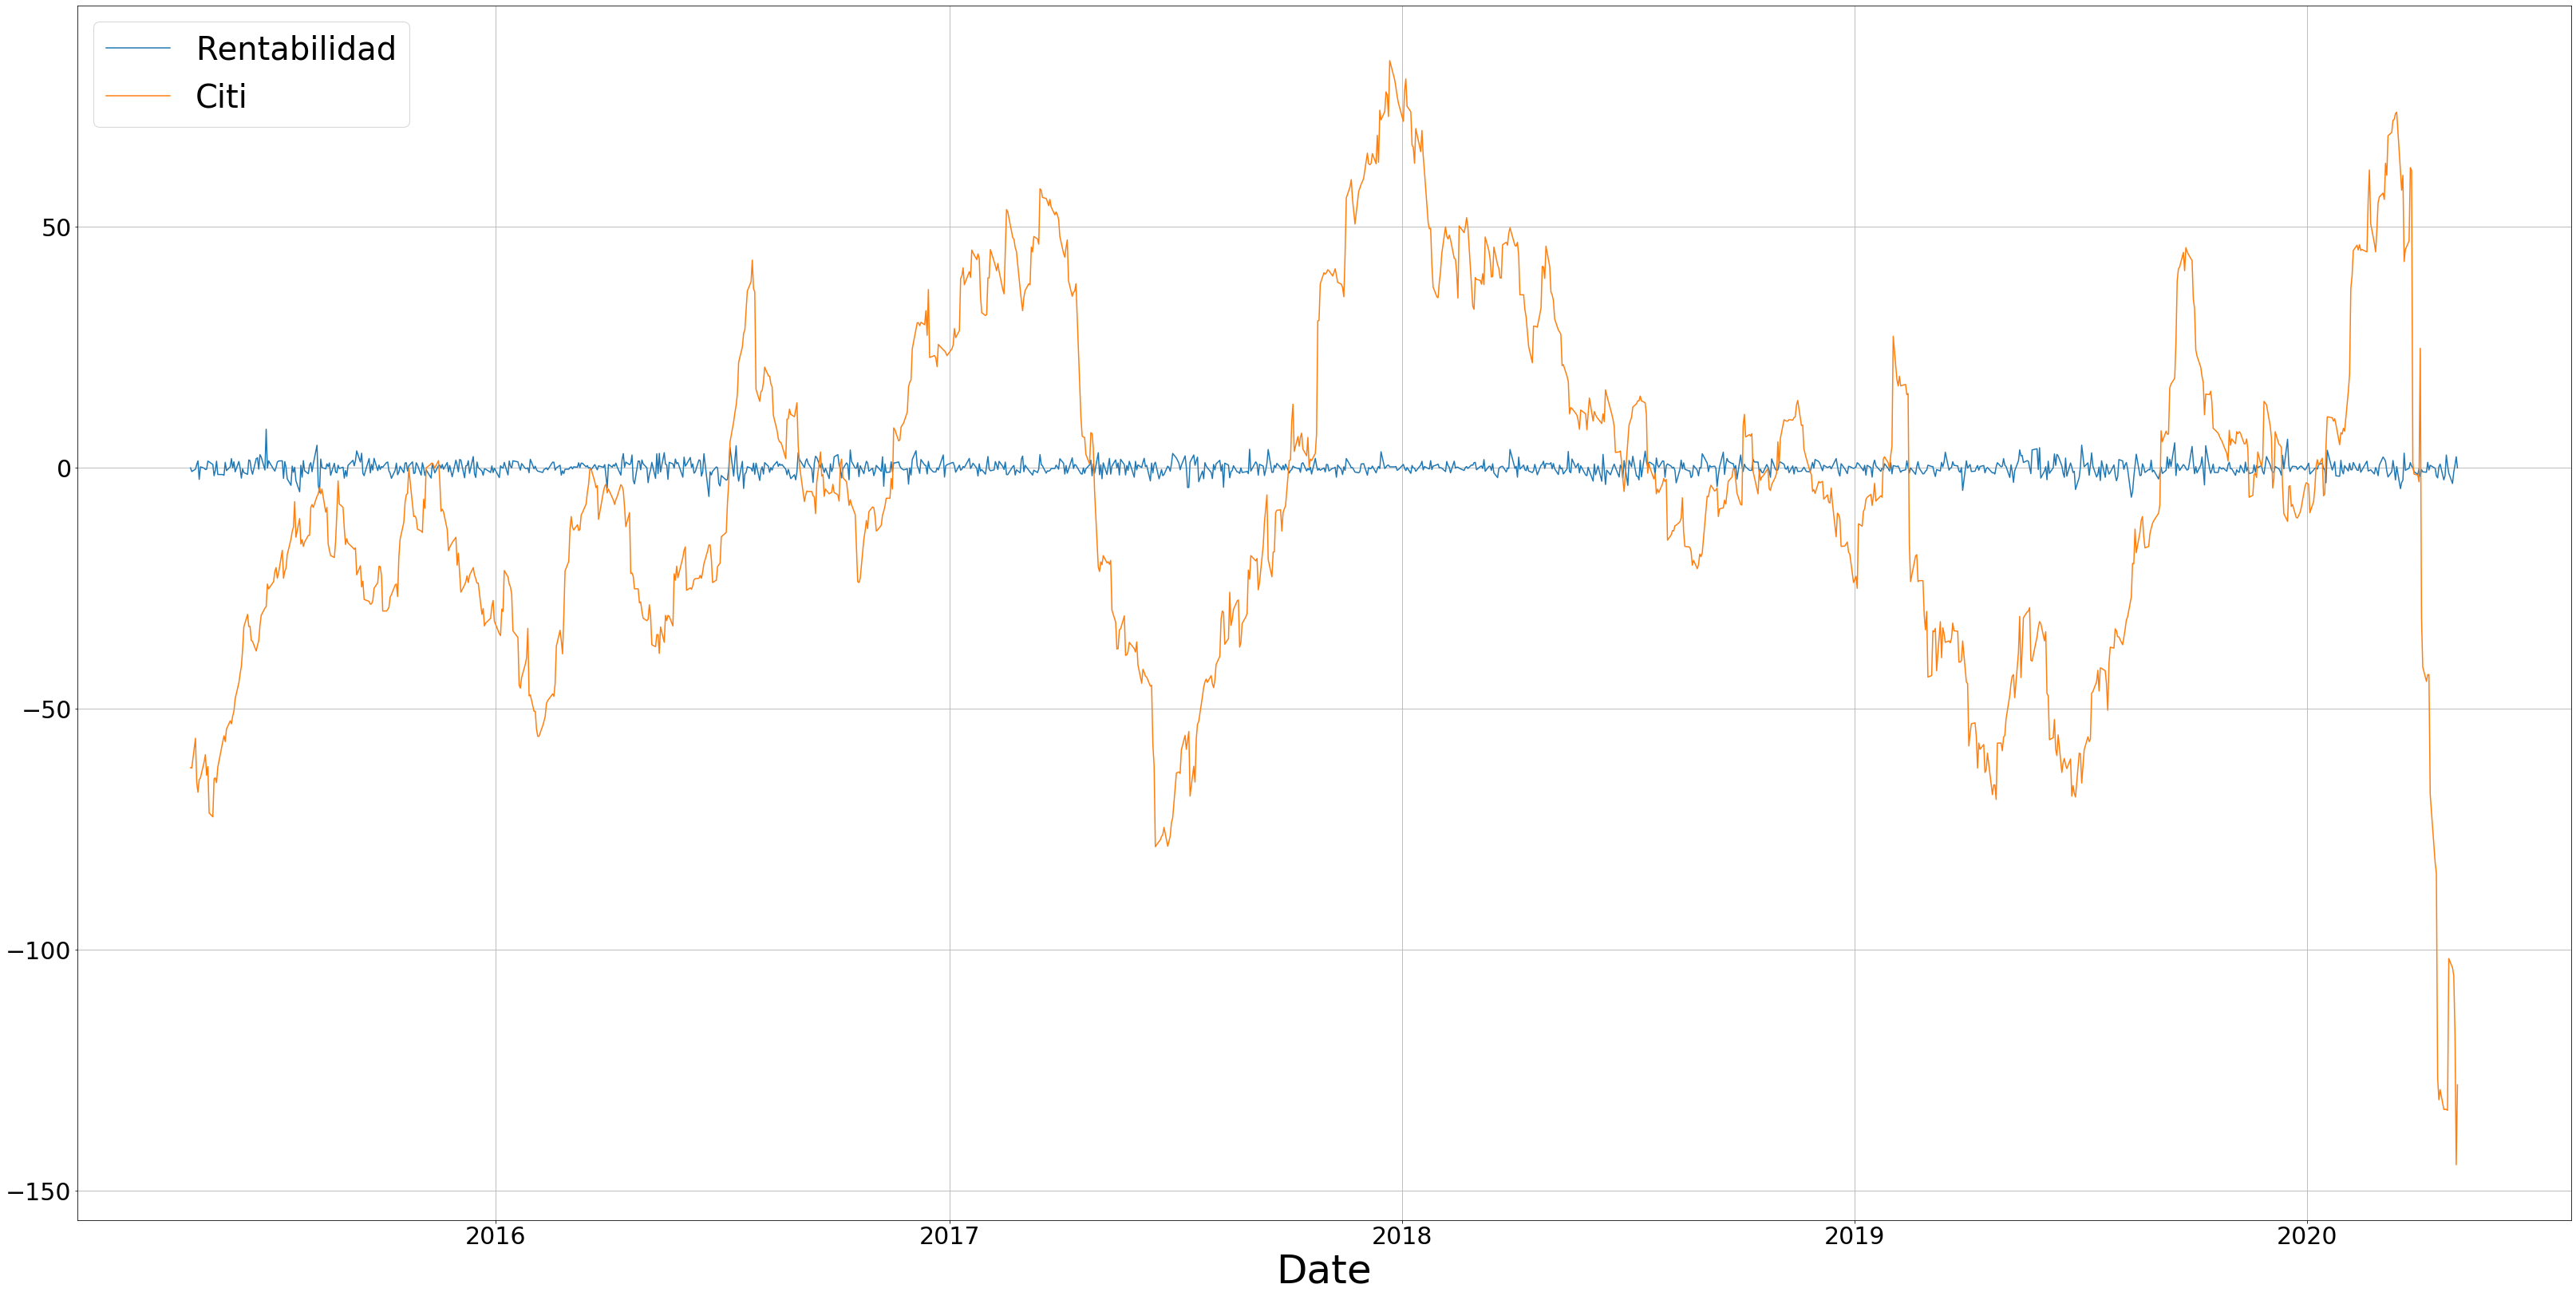

In [12]:
# Ploteo la rentabilidad y el Citi

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(wheat_final["Rentabilidad"])
ax1 = plt.plot(wheat_final["Citi"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Rentabilidad", "Citi"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [13]:
# Ahora calculo la correlación, debo elegir la ventana // Se hace entre el Precio y el Citi

def correlacion(ventana=100):
    
    wheat_final['Correlacion'] = wheat_final.Precio.rolling(window=ventana).corr(wheat_final.Citi)
    
correlacion()

In [14]:
# Visualizo una muestra // Dará NaN donde no haya ventana, meto un cero 

wheat_final = wheat_final.fillna(0)
wheat_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion
Date,,,,
2016-07-15,312.134021,21.9,-2.760524,-0.487044
2019-01-08,336.723713,-9.0,-0.588620,0.126958
2019-10-04,340.932759,23.2,-1.028939,-0.741209
2017-05-30,325.204218,-37.5,-1.937208,-0.120804
2019-11-18,325.868804,-5.7,-0.942761,-0.637088
2017-09-18,311.469435,-22.6,-0.916138,-0.522293
2019-03-19,328.970206,-36.3,-0.067295,0.287354
2018-08-30,302.165227,-18.4,-0.073260,0.543733
2020-01-30,336.280655,8.2,-1.236174,-0.085906


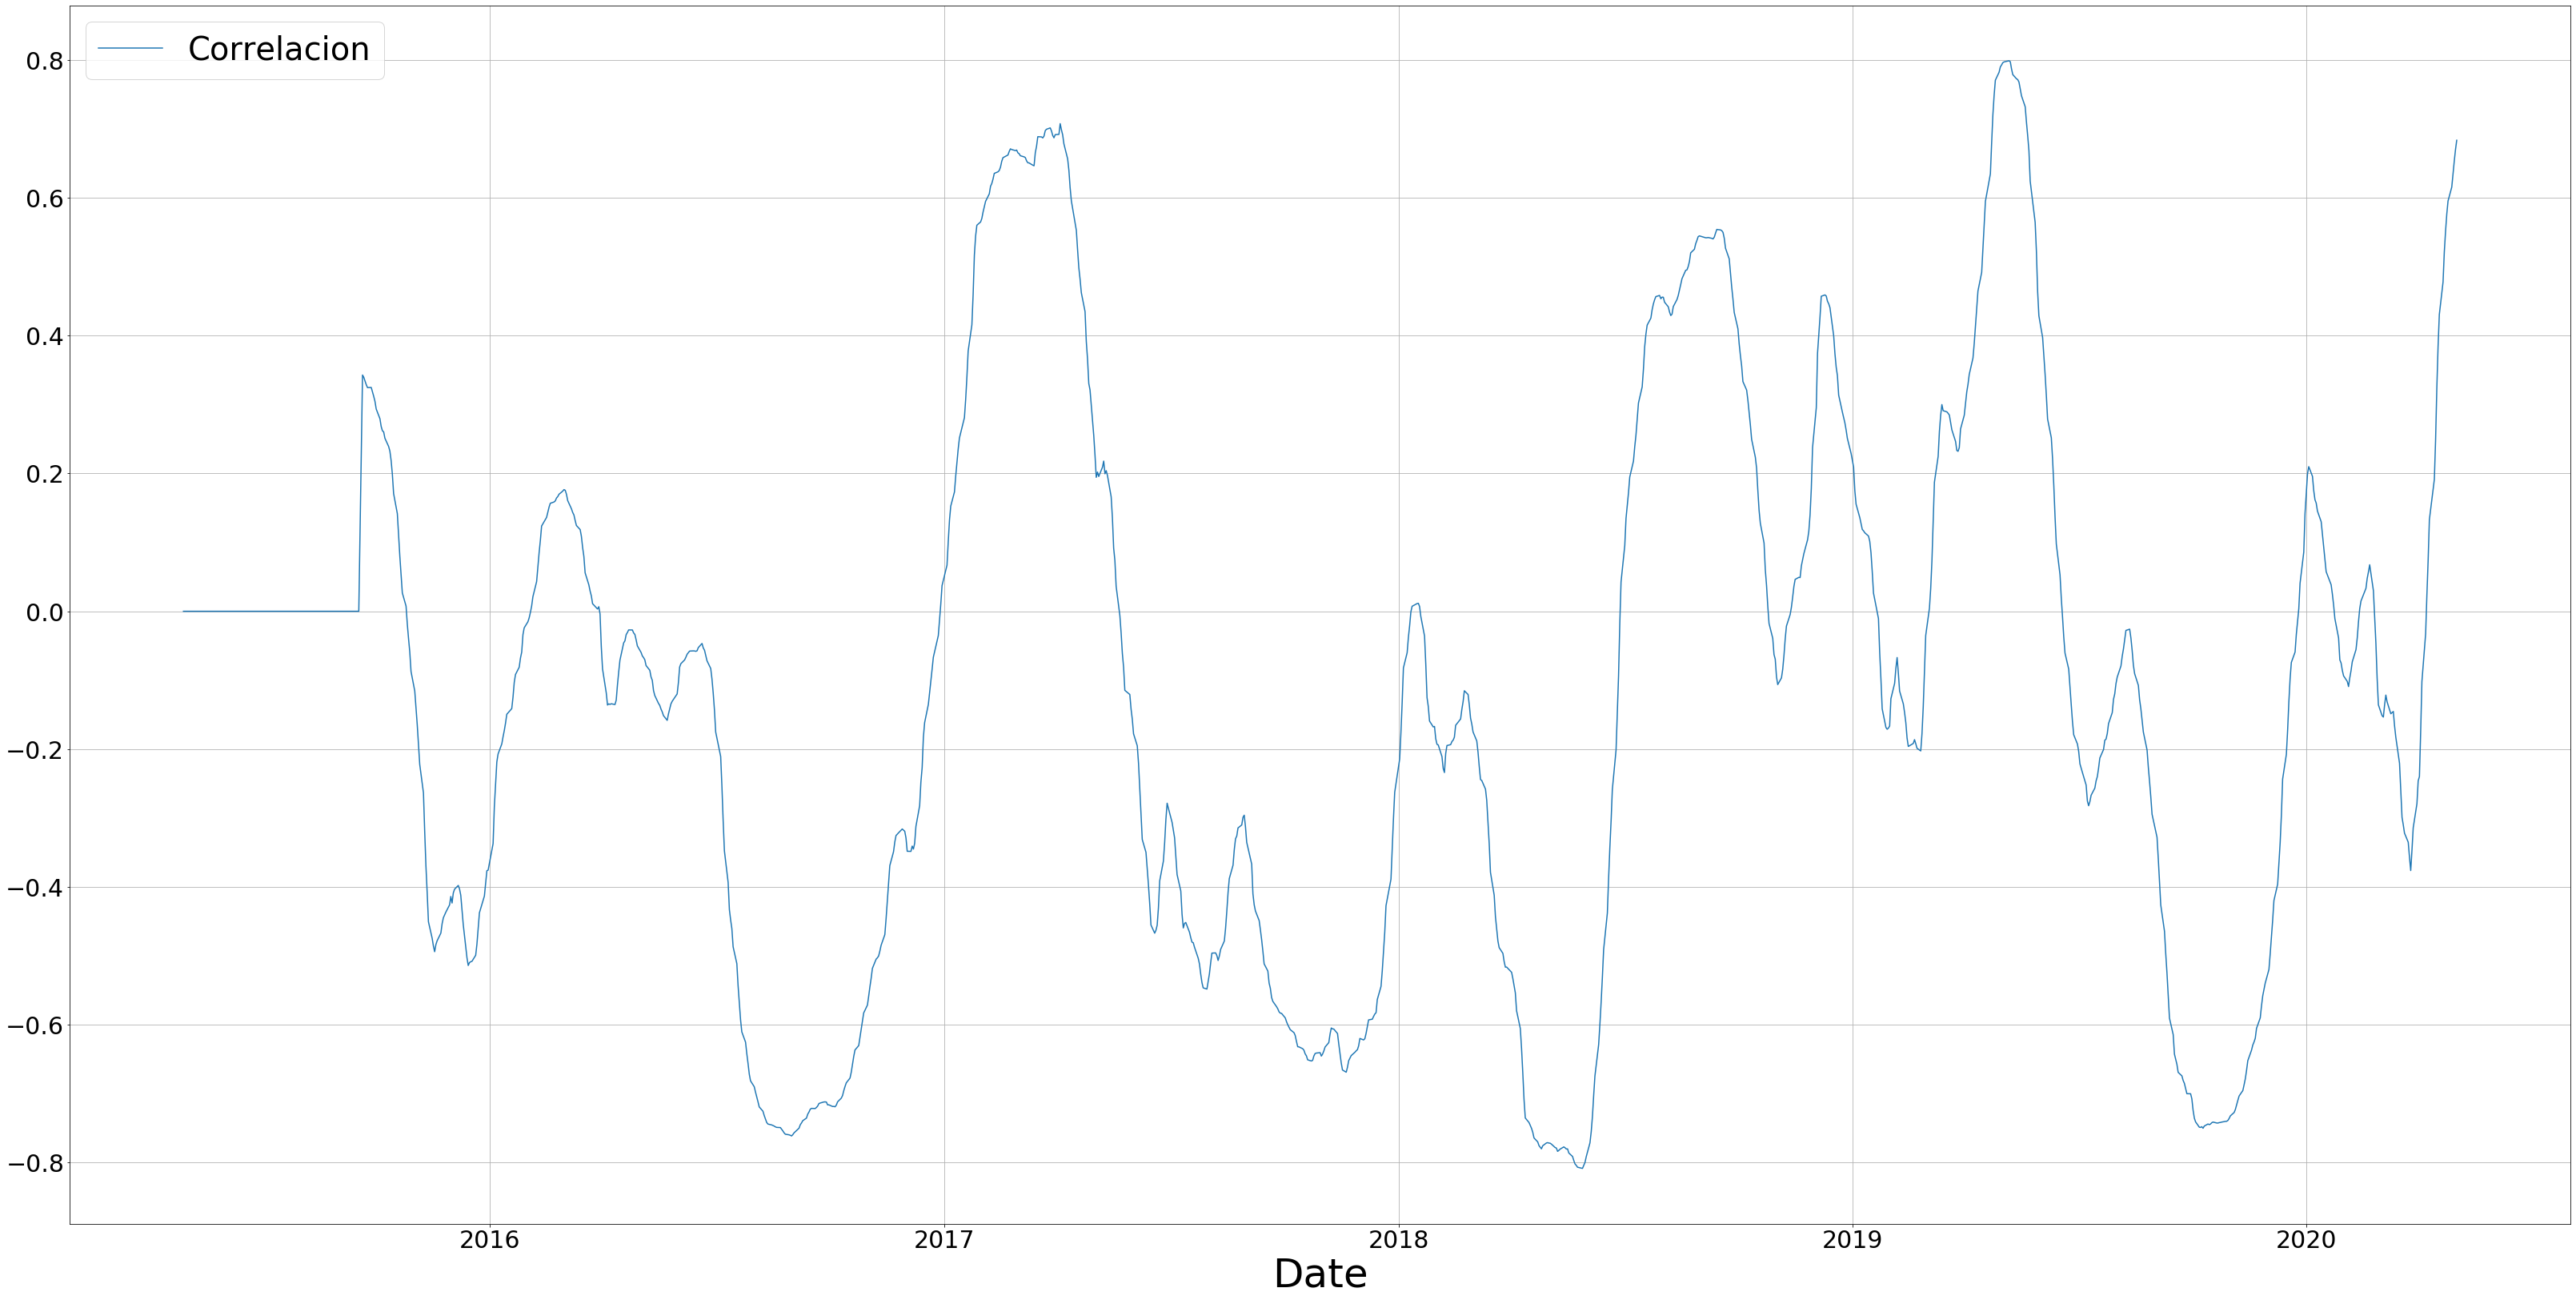

In [15]:
# Ploteo la correlacion

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(wheat_final["Correlacion"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Correlacion"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [16]:
# Ahora determino la señal


wheat_final['Señal'] = np.where((wheat_final.Correlacion>0)&(wheat_final.Citi>0),1, # Ambos mayores de cero
                          np.where((wheat_final.Correlacion>0)&(wheat_final.Citi<0),-1, # Uno mayor y otro menor de cero
                                  np.where((wheat_final.Correlacion<0)&(wheat_final.Citi>0),-1, # Uno menor y otro mayor de cero
                                          np.where((wheat_final.Correlacion<0)&(wheat_final.Citi<0),1,0)))) # Ambos menores de cero

In [17]:
# Visualizo una muestra

wheat_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion,Señal
Date,,,,,
2018-08-16,323.653516,-13.3,1.037344,0.474425,-1
2020-02-20,335.394540,61.8,-0.525624,0.057034,1
2016-03-18,325.204218,-0.2,-0.407056,0.055780,-1
2018-07-11,293.525605,13.9,-2.501840,0.255640,1
2017-08-30,291.974904,-21.2,-1.199400,-0.296035,1
2018-09-28,315.678481,-5.2,-2.330363,0.433852,-1
2017-08-18,311.912492,-29.4,0.427960,-0.387996,1
2019-07-10,384.795454,-56.3,0.579039,-0.282294,1
2019-10-08,350.680025,19.0,2.260982,-0.749286,-1


In [18]:
# Calculo el Profit & Loss

wheat_final['P&L'] = 100

for i in range(1, len(wheat_final)):
    
    wheat_final['P&L'].iloc[i] = wheat_final['P&L'].iloc[i-1] * (1 + wheat_final.Señal.iloc[i] *
                                                                 (wheat_final.Rentabilidad.iloc[i]/100))

In [19]:
# Visualizo una muestra

wheat_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion,Señal,P&L
Date,,,,,,
2015-07-28,332.293138,-15.8,0.536193,0.000000,0,100.000000
2019-04-05,321.216700,-53.1,-0.752909,0.343844,-1,74.614921
2019-02-25,328.305620,-23.4,-1.265823,-0.202754,1,75.990526
2017-04-06,319.665999,47.3,-1.096642,0.691560,1,105.197801
2016-05-10,335.394540,-34.6,2.923182,-0.095345,1,101.394929
2018-01-12,306.817331,70.4,-0.716846,0.007239,1,98.122544
2017-08-18,311.912492,-29.4,0.427960,-0.387996,1,96.587511
2015-09-03,308.146503,-14.7,-1.765537,0.000000,0,100.000000
2019-02-01,335.173012,27.3,0.464807,-0.126994,-1,77.815077


In [20]:
# Genero el Buy&Hold para hacer la comparación

wheat_final['Buy&Hold'] = 100

for i in range(1, len(wheat_final)):
    
    wheat_final['Buy&Hold'].iloc[i] = wheat_final['Buy&Hold'].iloc[i-1]*(1 + (wheat_final.Rentabilidad.iloc[i]/100))

In [21]:
# Visualizo una muestra

wheat_final.sample(20)

,Precio,Citi,Rentabilidad,Correlacion,Señal,P&L,Buy&Hold
Date,,,,,,,
2018-11-20,320.109056,8.9,-0.276052,0.048912,1,85.220657,99.655172
2017-08-04,324.761160,-40.8,0.825309,-0.496248,1,100.566258,101.103448
2019-12-09,324.096574,4.9,-0.204638,-0.396218,-1,39.537456,100.896552
2020-04-02,295.519364,-31.1,-0.373413,-0.174843,1,47.786185,92.000000
2019-06-28,372.389843,-68.3,-4.488636,-0.179286,1,55.374567,115.931034
2016-01-13,317.229182,-24.7,0.350385,-0.173133,1,97.082049,98.758621
2018-04-27,345.141806,46.0,0.906736,-0.775986,-1,89.387399,107.448276
2019-08-21,321.216700,-10.1,0.834492,-0.141450,1,47.765094,100.000000
2019-01-25,336.945242,2.3,0.862069,-0.141649,-1,78.457943,104.896552


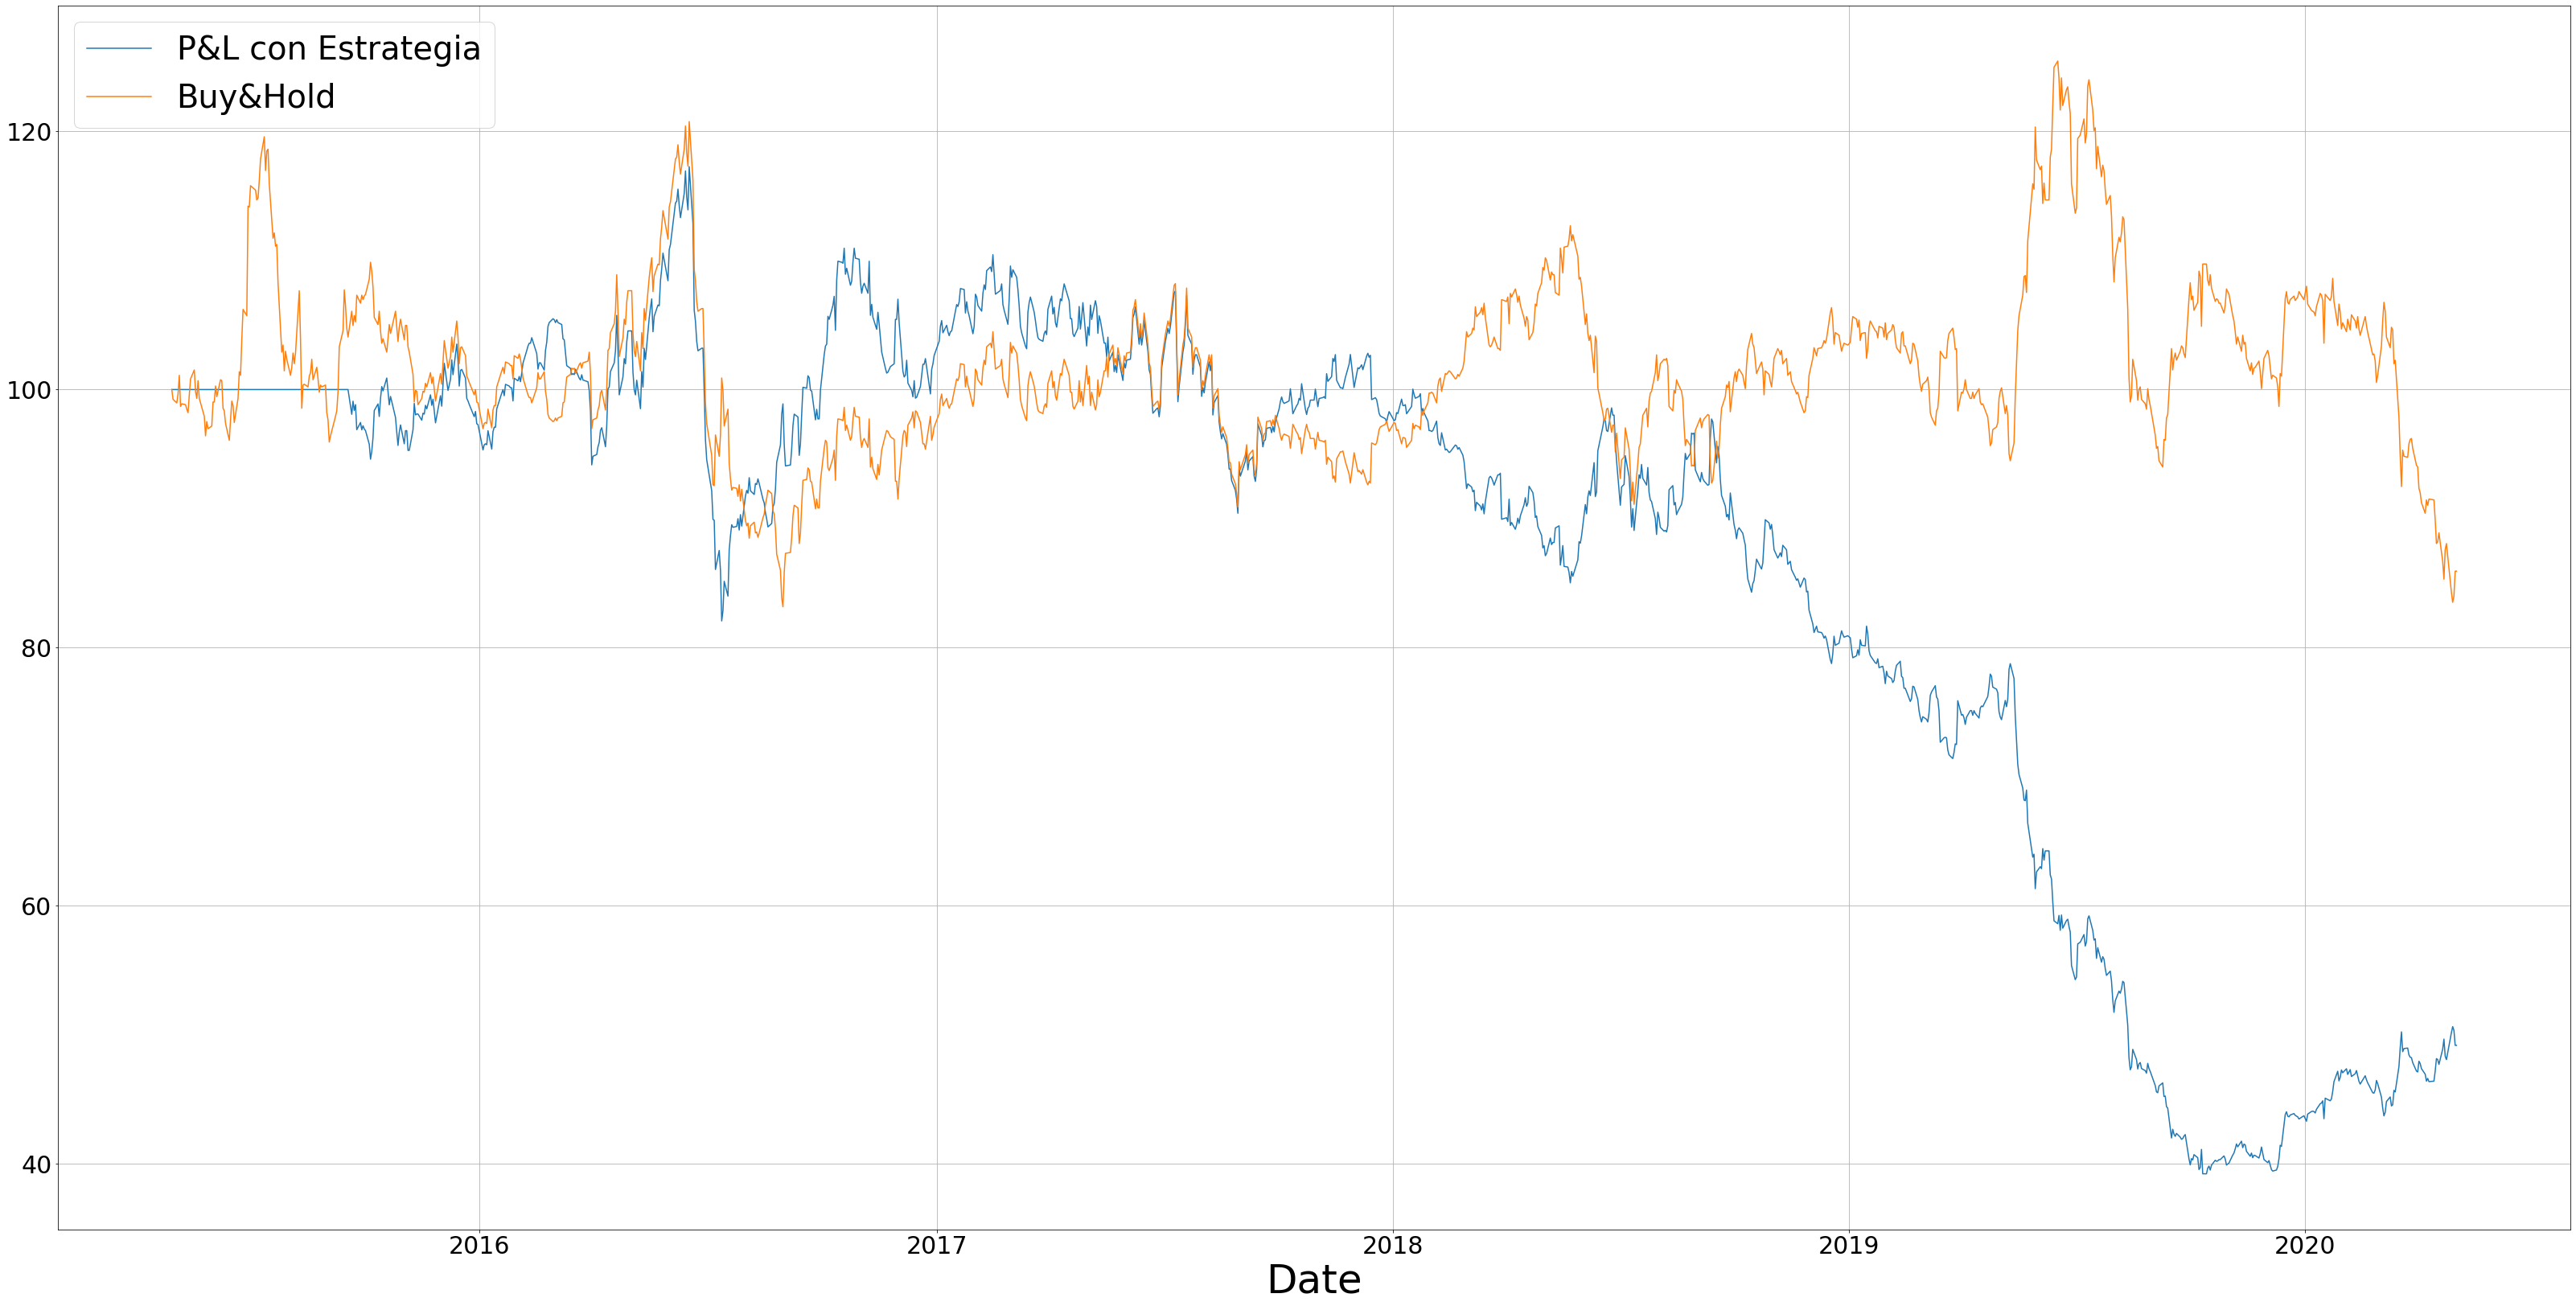

In [22]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(wheat_final["P&L"])
ax1 = plt.plot(wheat_final["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["P&L con Estrategia", "Buy&Hold"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [23]:
wheat_citi = pd.DataFrame(wheat_final.loc[:, 'P&L'])
wheat_citi.columns = ['Indice_wheat']
wheat_citi

,Indice_wheat
Date,
2015-04-30,100.000000
2015-05-01,100.000000
2015-05-04,100.000000
2015-05-05,100.000000
2015-05-06,100.000000
2015-05-07,100.000000
2015-05-08,100.000000
2015-05-11,100.000000
2015-05-12,100.000000


In [24]:
wheat_citi.to_csv('./data_resultante/wheat_citi.csv')